# Notebook to visualize **best hyperparameter** from ASHA HPO

## Plot trade-off curves against LoRA

In [7]:
monarch_ranks = [4, 8, 16, 32, 64]
monarch_rank_params = [0.14, 0.28, 0.56, 1.13, 2.25]
monarch_rank_res = [69.91, 69.8, 67.99, 69.51, 69.98]

lora_ranks = [4, 8, 16]
lora_params = [0.38, 0.76, 1.52]
lora_res = [65.0543, 68.3, 67.99667905057818]

monarch_blkszs = [1, 4, 16, 32, 64]
monarch_blksz_params = [0.14, 0.56, 2.25, 4.5, 9.]
monarch_blksz_res = [55.76, 62.39, 68.88, 67.9, 70.29]

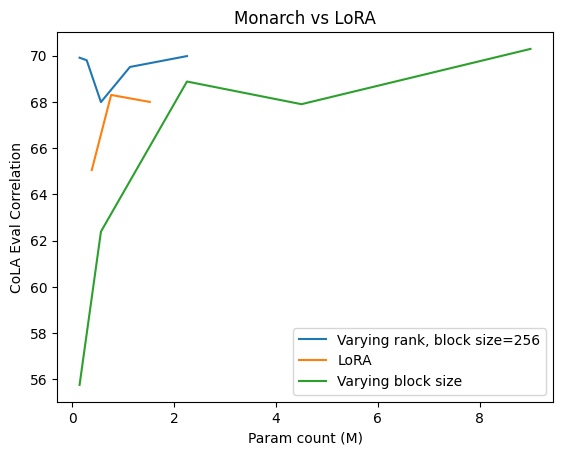

In [8]:
# plot rank vs lora, and then blksz vs lora as two lines connecting dots
import matplotlib.pyplot as plt

plt.title("Monarch vs LoRA")
plt.xlabel("Param count (M)")
plt.ylabel("CoLA Eval Correlation")

plt.plot(monarch_rank_params, monarch_rank_res, label="Varying rank, block size=256")
plt.plot(lora_params, lora_res, label="LoRA")
plt.plot(monarch_blksz_params, monarch_blksz_res, label="Varying block size")
# replace xticks with ranks
# monarch_ranks = [f"rank {r}" for r in monarch_ranks]
# plt.xticks(monarch_rank_params, monarch_ranks)


# lora_ranks = [f"rank {r}" for r in lora_ranks]
# plt.xticks(lora_params, lora_ranks)

plt.legend()
plt.savefig("monarch_vs_lora.png")
plt.show()


## Plot Hyperparams found in HPO

In [9]:
import glob
import json
tune_groups = ["dense rank 32", "dense rank 16"]
hp_groups = {}
results_path = "/results"
# find all folders with the tune_group name
for tune_group in tune_groups:
    jsons = glob.glob(f"{results_path}/**/{tune_group}/*.json", recursive=True)
    jsons = [json.load(open(j, "r")) for j in jsons]
    hp_groups[tune_group] = jsons

### plot by task or compare different groups

# Visualize monarch weight distribution

Text(0.5, 1.0, 'Llama monarch layer 11 distribution')

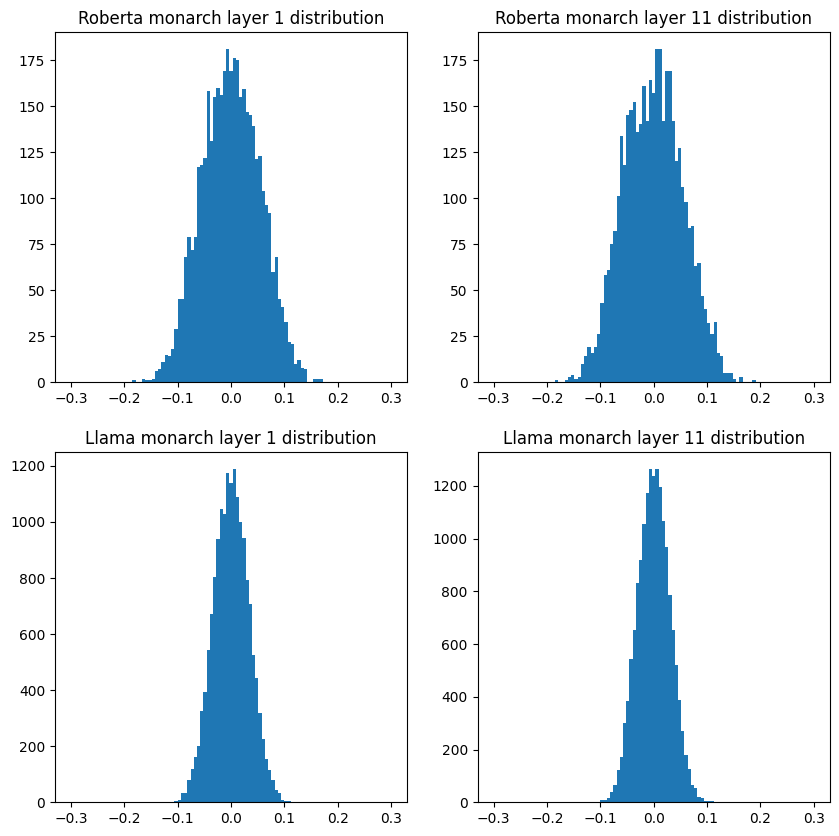

In [20]:
import torch
from safetensors import safe_open
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(10, 10))
nbins = 100
max_val = 0.3
with safe_open("results/monarch_roberta_glue/cola/default/checkpoint-7800/model.safetensors", framework="pt", device="cpu") as f:
    plt.subplot(2, 2, 1)
    weights = f.get_tensor("roberta.encoder.layer.0.attention.self.query.blkdiag1").cpu().flatten().numpy()
    plt.hist(weights, bins=np.linspace(-max_val, max_val, nbins))
    plt.title("Roberta monarch layer 1 distribution")
    
    plt.subplot(2, 2, 2)
    weights = f.get_tensor("roberta.encoder.layer.11.attention.self.query.blkdiag1").cpu().flatten().numpy()
    plt.hist(weights, bins=np.linspace(-max_val, max_val, nbins))
    plt.title("Roberta monarch layer 11 distribution")

plt.subplot(2, 2, 3)
llama_weights = torch.load("results/llama_mmlu/checkpoint-1683/pytorch_model-00001-of-00002.bin", map_location="cpu")
weights = llama_weights["model.layers.1.self_attn.q_proj.blkdiag1"].cpu().flatten().numpy()
plt.hist(weights, bins=np.linspace(-max_val, max_val, nbins))
plt.title("Llama monarch layer 1 distribution")

plt.subplot(2, 2, 4)
weights = llama_weights["model.layers.11.self_attn.q_proj.blkdiag1"].cpu().flatten().numpy()
plt.hist(weights, bins=np.linspace(-max_val, max_val, nbins))
plt.title("Llama monarch layer 11 distribution")


Text(0.5, 1.0, 'Instruction tuning layer 11 distribution')

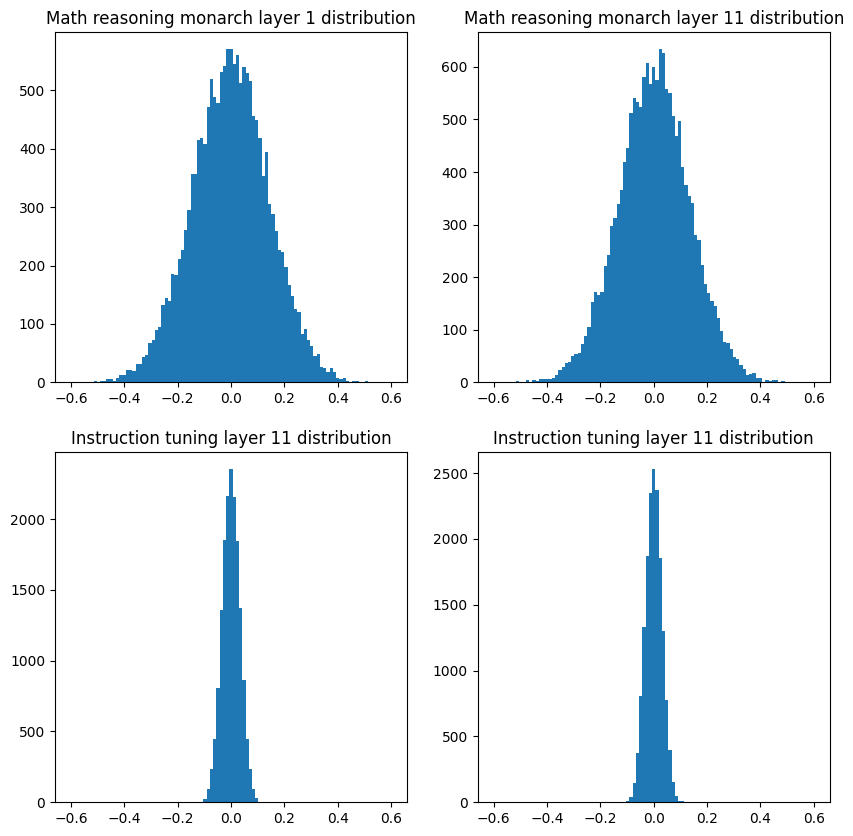

In [23]:
plt.figure(figsize=(10, 10))
math_ckpt = "pyreft/loreft/official_results/llama-7b-hf.math.20240501152313795515/checkpoint-3500/intervenable_model/pytorch_model.bin"
instruct_ckpt = "results/llama_mmlu/checkpoint-1683/pytorch_model-00001-of-00002.bin"
llama_math_weights = torch.load(math_ckpt, map_location="cpu")
llama_weights = torch.load(instruct_ckpt, map_location="cpu")
nbins = 100
max_val = 0.6
plt.subplot(2, 2, 1)
weights = llama_math_weights["model.layers.1.self_attn.q_proj.blkdiag1"]
plt.hist(weights.detach().cpu().flatten(), bins=np.linspace(-max_val, max_val, nbins))
plt.title("Math reasoning monarch layer 1 distribution")

plt.subplot(2, 2, 2)
weights = llama_math_weights["model.layers.11.self_attn.q_proj.blkdiag1"]
plt.hist(weights.detach().cpu().flatten(), bins=np.linspace(-max_val, max_val, nbins))
plt.title("Math reasoning monarch layer 11 distribution")

plt.subplot(2, 2, 3)

weights = llama_weights["model.layers.1.self_attn.q_proj.blkdiag1"]
plt.hist(weights.cpu().flatten(), bins=np.linspace(-max_val, max_val, nbins))
plt.title("Instruction tuning layer 11 distribution")

plt.subplot(2, 2, 4)
weights = llama_weights["model.layers.11.self_attn.q_proj.blkdiag1"]
plt.hist(weights.cpu().flatten(), bins=np.linspace(-max_val, max_val, nbins))
plt.title("Instruction tuning layer 11 distribution")